#   Scheduling Strategy Stats

In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

## Network Distance Metric

In [2]:
import json
import numpy as np
import matplotlib.pyplot as plt


results_file = "results.json"

from pprint import pprint

with open(results_file) as data_file:    
    data = json.load(data_file)

network_metrics = data['networkMetricStats']
scheduling_status_metrics = data['schedulingStatusStats']
runtime_metrics = data['runtimeStats']

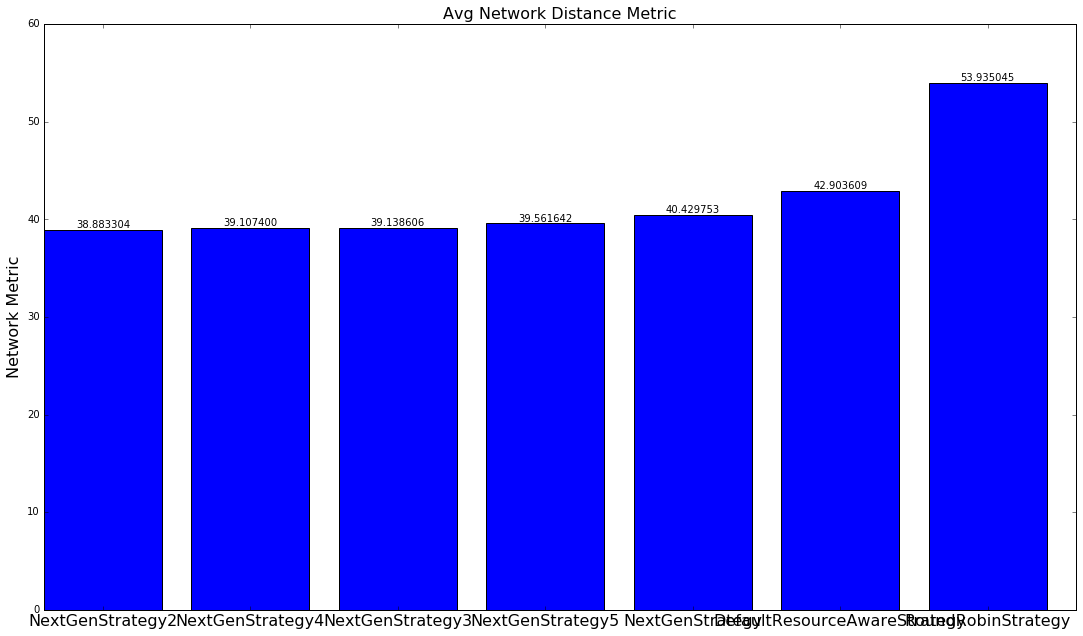

In [3]:
# plot averages
avg_values = {}

for key, value in network_metrics.iteritems():
    avg_values[key] = value["avg"]

        
sorted_avg = sorted(avg_values.values())
sorted_avg_keys = sorted(avg_values, key=avg_values.get)
sorted_std = []

for key in sorted_avg_keys:
    sorted_std.append(network_metrics[key]['std'])
    

# pprint(sorted_avg)
# pprint(sorted_avg_keys)
# pprint(sorted_std)


N = len(sorted_avg_keys)
menMeans = sorted_avg

ind = np.arange(N)  # the x locations for the groups
width = 0.8       # the width of the bars
fig, ax = plt.subplots()
rects = ax.bar(ind, sorted_avg, width)
fig.set_size_inches(18.5, 10.5)

# add some text for labels, title and axes ticks
ax.set_ylabel('Network Metric', fontsize=16)
ax.set_title('Avg Network Distance Metric', fontsize=16)
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(sorted_avg_keys)
ax.tick_params(axis='x', labelsize=16)



def autolabel(rects):
    # attach some text labels
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., height,
                '%f' % height,
                ha='center', va='bottom')

autolabel(rects)

plt.show()

In [4]:
#within optimal solution
percent_to_optimal = {}

if "OptimalStrategy" in network_metrics:
    optimal_avg = network_metrics["OptimalStrategy"]["avg"]
    for key, value in network_metrics.iteritems():
        if key != "OptimalStrategy":
            percent_to_optimal[key] = ((value["avg"] - optimal_avg) / optimal_avg)


    # pprint(percent_to_optimal)

    sorted_percent_to_optimal = sorted(percent_to_optimal.values())
    sorted_percent_to_optimal_keys = sorted(percent_to_optimal, key=percent_to_optimal.get)
    sorted_std = []


    ind = np.arange(N - 1)  # the x locations for the groups
    width = 0.8       # the width of the bars
    fig, ax = plt.subplots()
    rects = ax.bar(ind, sorted_percent_to_optimal, width)
    fig.set_size_inches(18.5, 10.5)

    # add some text for labels, title and axes ticks
    ax.set_ylabel('magnitude', fontsize=16)
    ax.set_title('To Optimal Solution', fontsize=16)
    ax.set_xticks(ind + width / 2)
    ax.set_xticklabels(sorted_percent_to_optimal_keys)
    ax.tick_params(axis='x', labelsize=16)

    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 0.01 + height,
                '%.1fX' % height,
                ha='center', va='bottom', fontsize=14)


    plt.show()

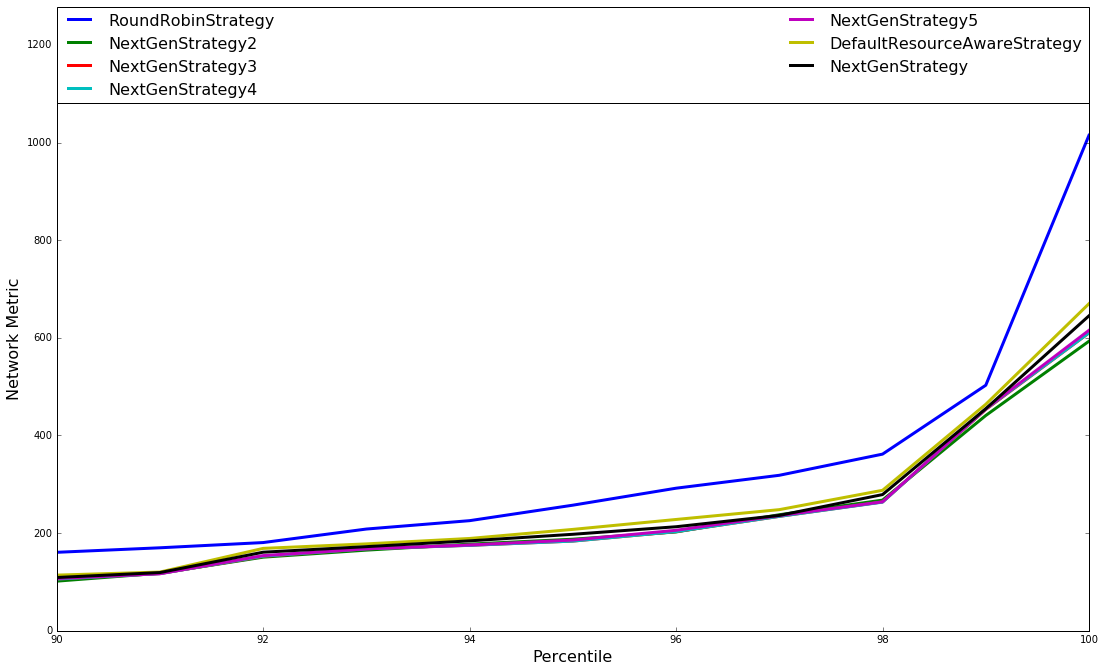

In [5]:
#percentiles
percentiles = {}

plt.figure(figsize=(18.5, 10.5), dpi=100)


for key, value in network_metrics.iteritems():
    percentiles[key] = value["percentiles"]
    plt.plot(range(90, 100+1), value["percentiles"][89:], label=key, linewidth=3)

plt.legend(bbox_to_anchor=(0., 0.9, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0., fontsize=16)
# print(percentiles)


plt.ylabel('Network Metric', fontsize=16)
plt.xlabel('Percentile', fontsize=16)
plt.title('Network Distance Metric Percentile (CDF)', fontsize=16)


plt.show()

## Schedulability

### Given a scheduling solutions exists:


In [6]:
#scheduling confidence
if "OptimalStrategy" in scheduling_status_metrics:
    optimalSuccess = scheduling_status_metrics["OptimalStrategy"]["success"]["OptimalStrategy"]

    successProb = {}
    for key,value in scheduling_status_metrics["OptimalStrategy"]["success"].iteritems():
        if key != "OptimalStrategy":
            successProb[key] = float(value) / optimalSuccess
            print "P(%s | OptimalStrategy) = %f%%" % (key, successProb[key] * 100)

### Other Schedulability Stats 

In [7]:
successProb = {}
for key1,value1 in scheduling_status_metrics.iteritems():
    if key1 != "OptimalStrategy":
        p = value1["success"][key1]
        for key2,value2 in  value1["success"].iteritems():
            if key1 != key2:
                print "P(%s | %s) = %f%%" % (key2, key1, float(value2) / p * 100)
        print "\n"

P(NextGenStrategy2 | RoundRobinStrategy) = 94.783849%
P(NextGenStrategy3 | RoundRobinStrategy) = 99.960719%
P(NextGenStrategy4 | RoundRobinStrategy) = 99.958651%
P(NextGenStrategy5 | RoundRobinStrategy) = 99.964854%
P(DefaultResourceAwareStrategy | RoundRobinStrategy) = 99.997933%
P(NextGenStrategy | RoundRobinStrategy) = 99.995865%


P(RoundRobinStrategy | NextGenStrategy2) = 99.741107%
P(NextGenStrategy3 | NextGenStrategy2) = 100.000000%
P(NextGenStrategy4 | NextGenStrategy2) = 100.000000%
P(NextGenStrategy5 | NextGenStrategy2) = 99.995649%
P(DefaultResourceAwareStrategy | NextGenStrategy2) = 99.997824%
P(NextGenStrategy | NextGenStrategy2) = 100.000000%


P(RoundRobinStrategy | NextGenStrategy3) = 99.277237%
P(NextGenStrategy2 | NextGenStrategy3) = 94.380108%
P(NextGenStrategy4 | NextGenStrategy3) = 99.997947%
P(NextGenStrategy5 | NextGenStrategy3) = 99.991787%
P(DefaultResourceAwareStrategy | NextGenStrategy3) = 99.993840%
P(NextGenStrategy | NextGenStrategy3) = 99.995893%


P(Roun

## Runtime Stats

[0.9122732754400872,
 11.120616469166466,
 11.163954331479255,
 16.346183615033834,
 63.515419797242856,
 69.12739757801667,
 77.61690362661653]
[u'RoundRobinStrategy',
 u'NextGenStrategy2',
 u'NextGenStrategy4',
 u'DefaultResourceAwareStrategy',
 u'NextGenStrategy3',
 u'NextGenStrategy',
 u'NextGenStrategy5']


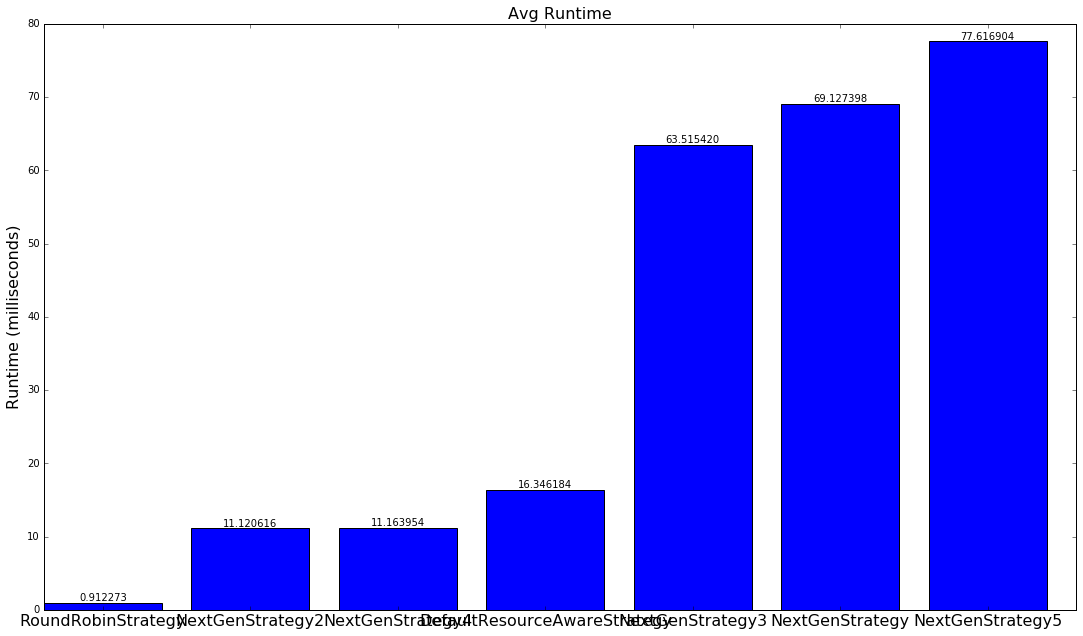

In [8]:
#runtime

# plot averages
avg_values = {}

for key, value in runtime_metrics.iteritems():
    avg_values[key] = value["avg"] / 1000000.0

        
sorted_avg = sorted(avg_values.values())
sorted_avg_keys = sorted(avg_values, key=avg_values.get)

pprint(sorted_avg)
pprint(sorted_avg_keys)


N = len(sorted_avg_keys)
menMeans = sorted_avg

ind = np.arange(N)  # the x locations for the groups
width = 0.8       # the width of the bars
fig, ax = plt.subplots()
rects = ax.bar(ind, sorted_avg, width)
fig.set_size_inches(18.5, 10.5)

# add some text for labels, title and axes ticks
ax.set_ylabel('Runtime (milliseconds)', fontsize=16)
ax.set_title('Avg Runtime', fontsize=16)
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(sorted_avg_keys)
ax.tick_params(axis='x', labelsize=16)



def autolabel(rects):
    # attach some text labels
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 0.01 + height,
                '%f' % height,
                ha='center', va='bottom')

autolabel(rects)

plt.show()